In [539]:
import sys

import matplotlib.pyplot as plt

assert sys.version_info >= (3, 5)

In [540]:
import sklearn
assert sklearn.__version__ >= '0.20'

In [541]:
import numpy as np
import os

In [542]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [543]:
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'end_to_end_project'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [544]:
def save_fig(fig_id, tight_layout=True,
             fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [545]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/codingalzi/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + "notebooks/datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [546]:
fetch_housing_data()

In [547]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [548]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [549]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [550]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [551]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [552]:
import matplotlib.pyplot as plt

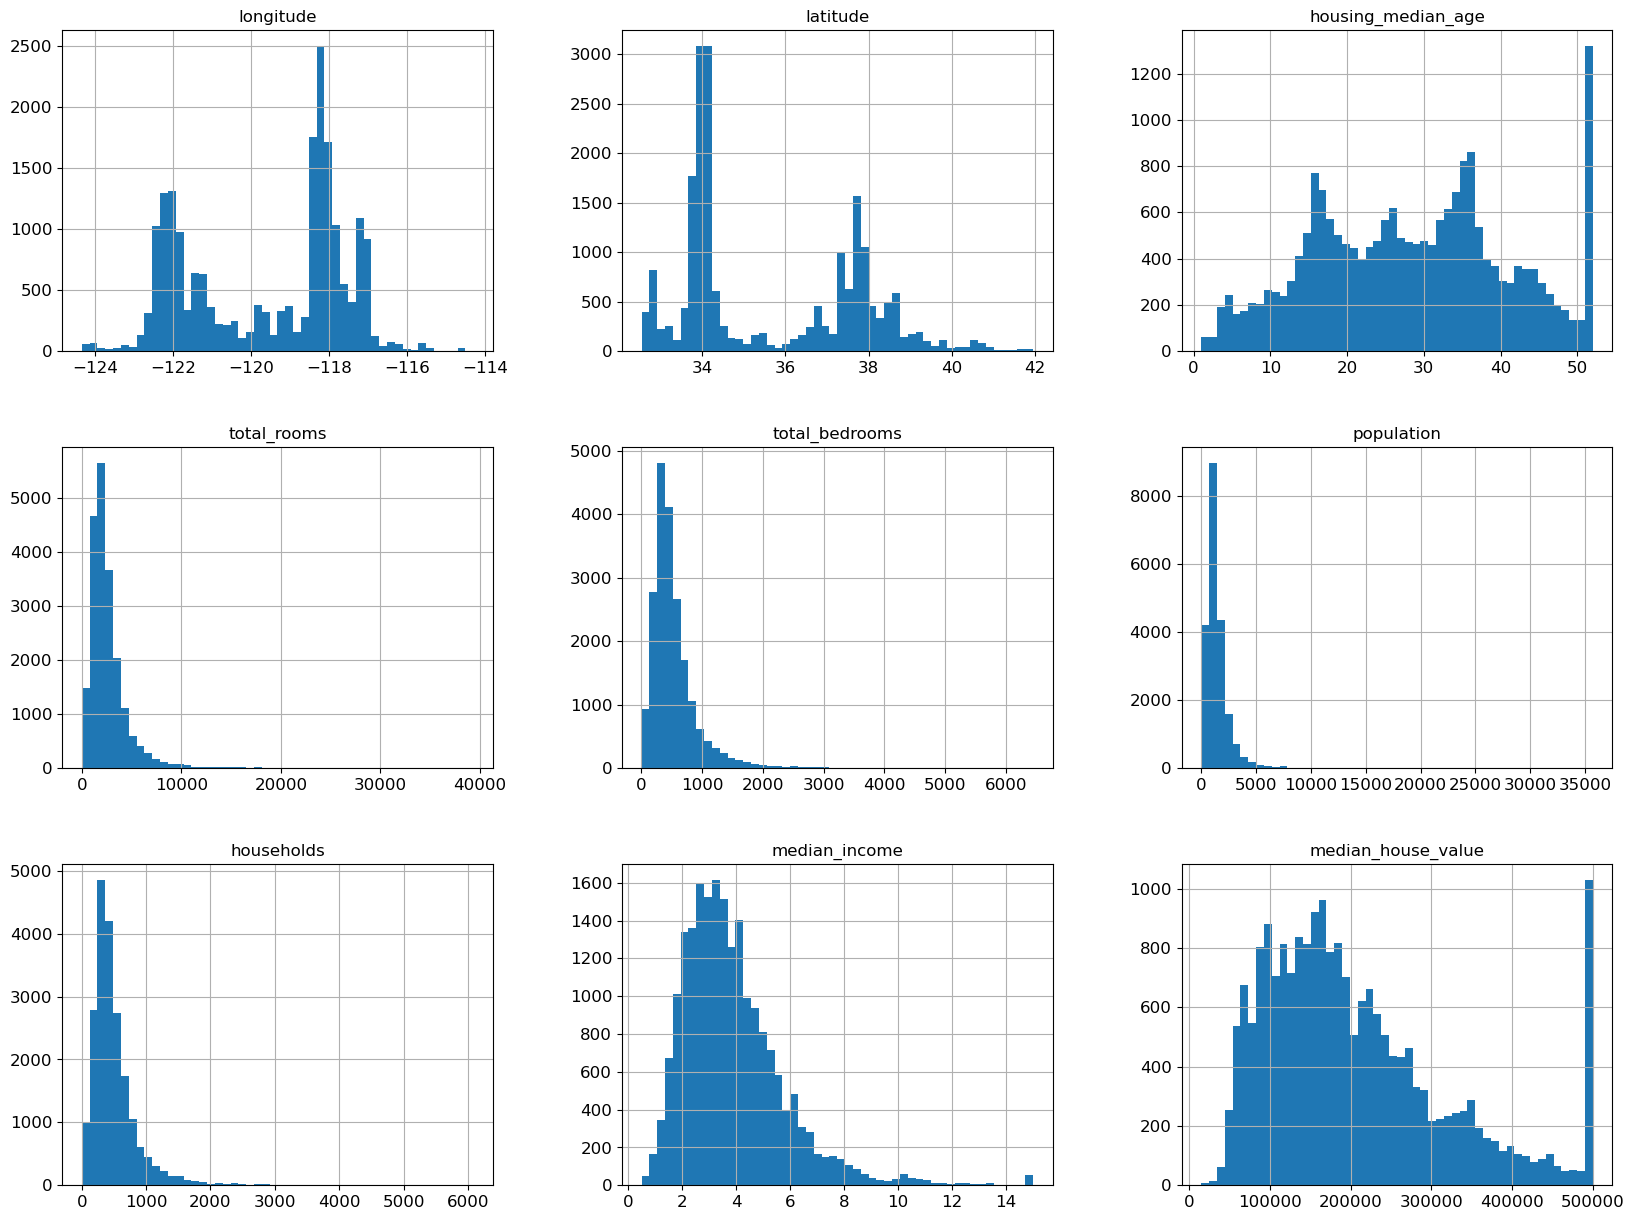

In [553]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [554]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [555]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [556]:
len(test_set)

4128

In [557]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [558]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [559]:
housing_with_id = housing.reset_index()

In [560]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [561]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [562]:
from sklearn.model_selection import train_test_split

In [563]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<Axes: >

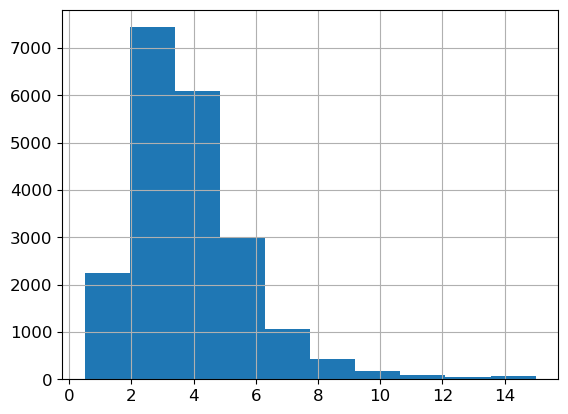

In [564]:
housing['median_income'].hist()

In [565]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

In [566]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<Axes: >

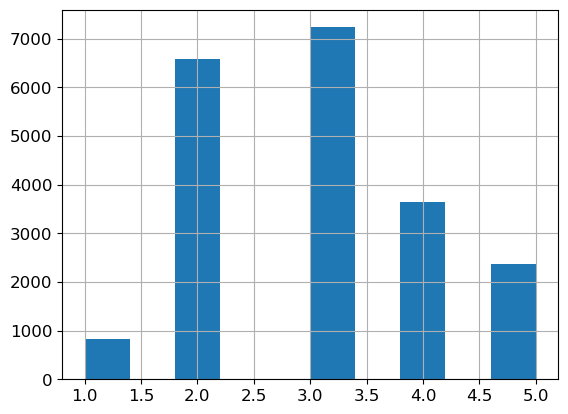

In [567]:
housing['income_cat'].hist()

In [568]:
from sklearn.model_selection import StratifiedShuffleSplit

In [569]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [570]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [571]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)

In [572]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
compare_props = pd.DataFrame({
    'Overall': income_cat_proportions(housing),
    'Stratified': income_cat_proportions(strat_test_set),
    'Random': income_cat_proportions(test_set)
}).sort_index()

In [573]:
compare_props['Rand. %error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100

In [574]:
compare_props['Strat. %error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

In [575]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [576]:
for set_ in (strat_train_set, strat_test_set):
    if 'income_cat' in set_.columns:
        set_.drop('income_cat', axis=1, inplace=True)

In [577]:
housing = strat_train_set.copy()

그림 저장: bad_visualization_plot


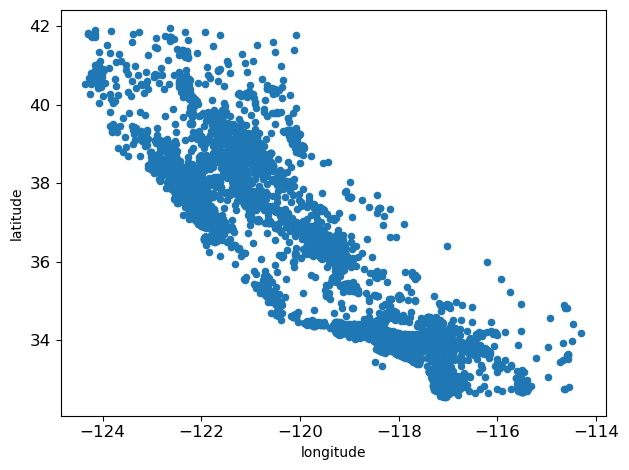

In [578]:
housing.plot(kind='scatter', x='longitude', y='latitude')
save_fig('bad_visualization_plot')

그림 저장: better_visualization_plot


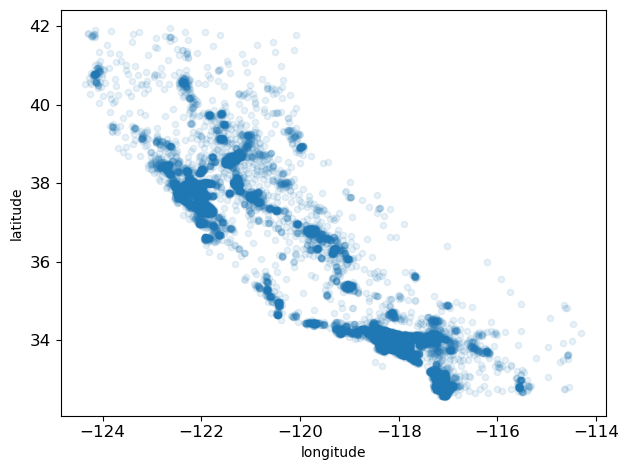

In [579]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
save_fig('better_visualization_plot')

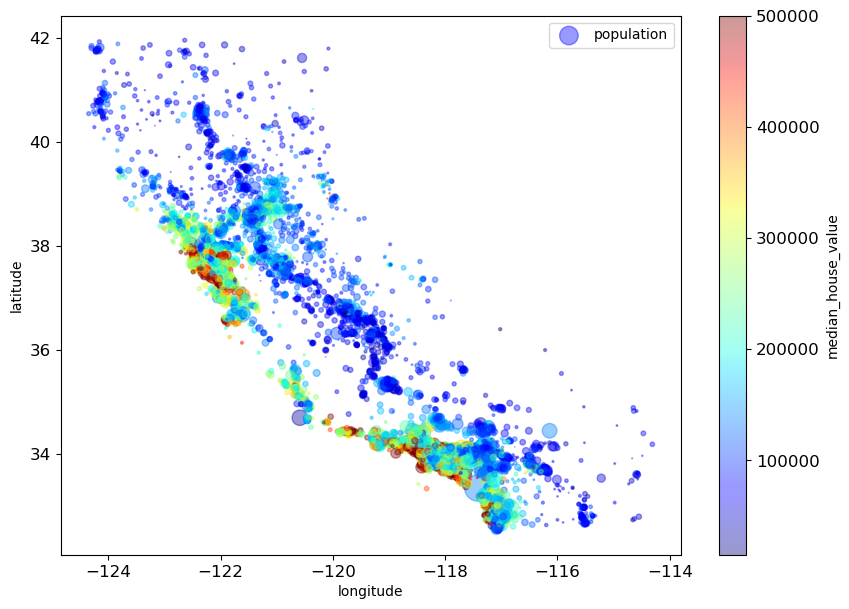

In [580]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population'] / 100, label='population', figsize=(10, 7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.legend()

In [581]:
corr_matrix = housing.corr()

/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_21240/2491629433.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [582]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [583]:
# 캘리포니아 지도 다운로드
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x2da188670>)

그림 저장: california_housing_prices_plot


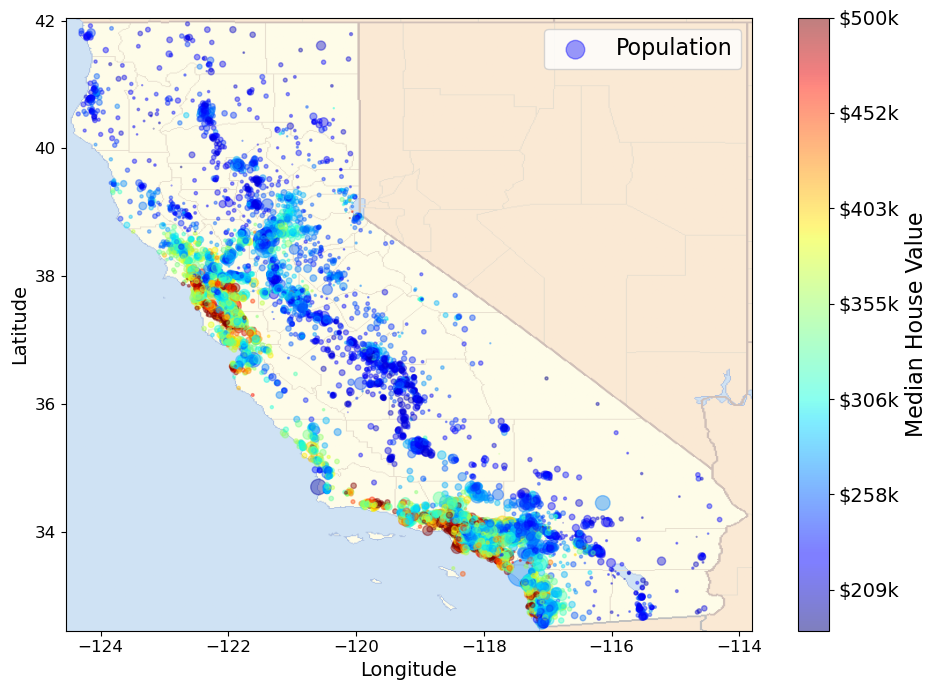

In [584]:
import matplotlib.image as mpimg
california_img = mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7),
                  s=housing['population'] / 100, label='Population',
                  c='median_house_value', cmap=plt.get_cmap('jet'),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05],
           alpha=0.5, cmap=plt.get_cmap('jet'))
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)

prices = housing['median_house_value']
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values / prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values],fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig('california_housing_prices_plot')

In [585]:
from pandas.plotting import scatter_matrix

그림 저장: scatter_matrix_plot


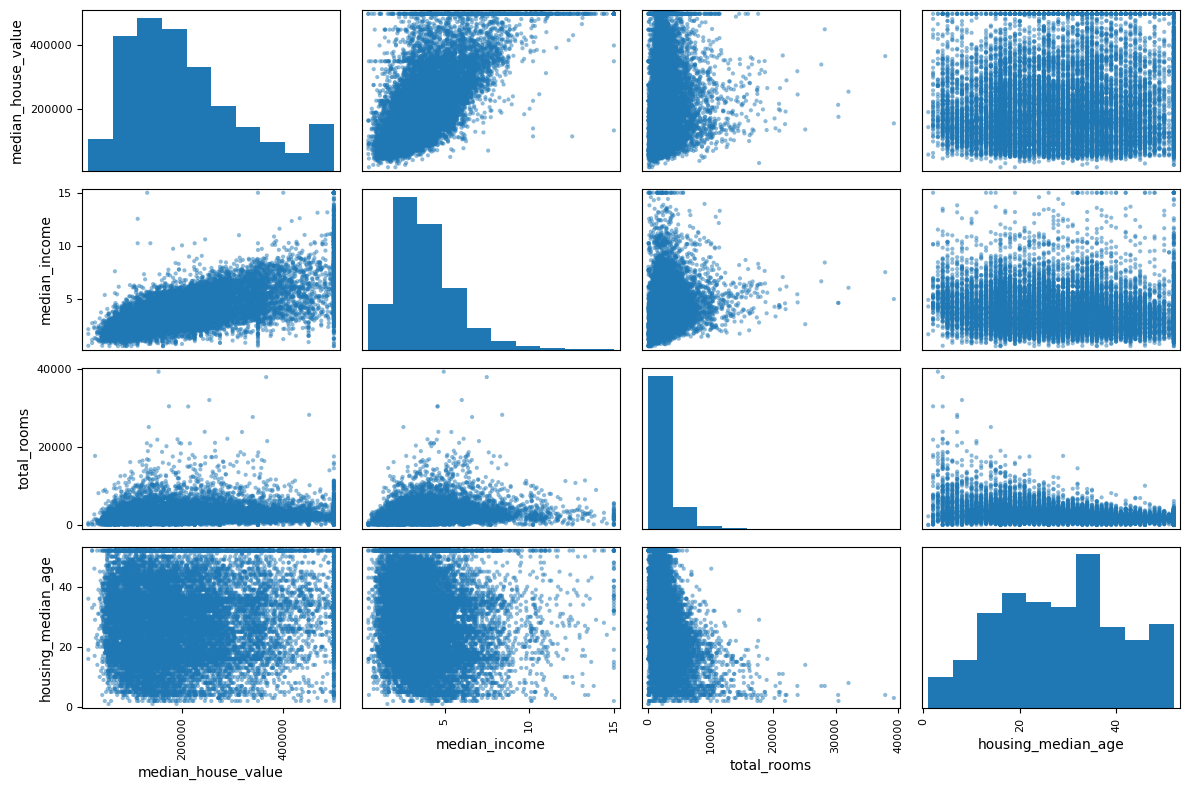

In [586]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig('scatter_matrix_plot')

<Axes: xlabel='median_income', ylabel='median_house_value'>

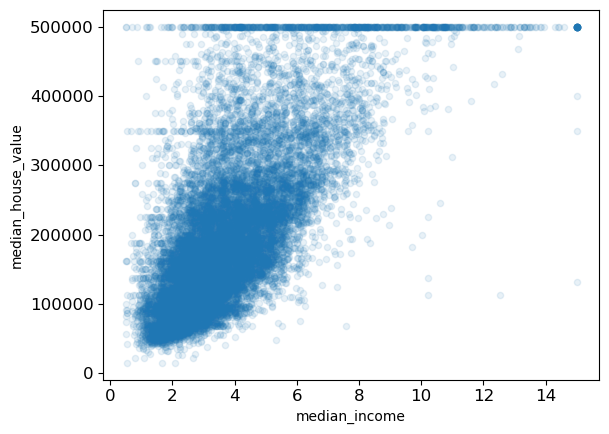

In [587]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
             alpha=0.1)

In [588]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [589]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_21240/324369740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

<Axes: xlabel='rooms_per_household', ylabel='median_house_value'>

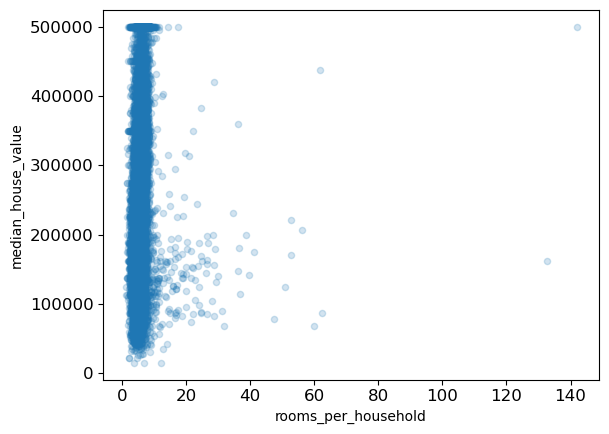

In [590]:
housing.plot(kind='scatter', x='rooms_per_household', y='median_house_value', alpha=0.2)

In [591]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [592]:
# housing.dropna(subset=['total_bedrooms'])
# housing.drop('total_bedrooms', axis=1)
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [593]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [594]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [595]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [596]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [597]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [598]:
X = imputer.transform(housing_num)

In [599]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

### 2.5.2 텍스트와 범주형 특성 다루기

In [600]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [601]:
from sklearn.preprocessing import OrdinalEncoder

In [602]:
ordinal_encoder = OrdinalEncoder()

In [603]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [604]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [605]:
from sklearn.preprocessing import OneHotEncoder

In [606]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [607]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [608]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 2.5.3 나만의 변환기

In [609]:
from sklearn.base import BaseEstimator, TransformerMixin

In [610]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [611]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [612]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [613]:
col_names = 'total_rooms', 'total_bedrooms', 'population', 'households'
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names
]

In [614]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+['rooms_per_household', 'population_per_household'],
    index=housing.index
)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


### 2.5.5 변환 파이프라인

In [615]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [616]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler())
])

In [617]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [618]:
from sklearn.compose import ColumnTransformer

In [619]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [620]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [621]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [622]:
housing_prepared.shape

(16512, 16)

## 2.6 모델 선택과 훈련
### 2.6.1 훈련 세트에서 훈련하고 평가하기

In [623]:
from sklearn.linear_model import LinearRegression

In [624]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [625]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [626]:
some_data_prepared = full_pipeline.transform(some_data)

In [627]:
print("예측:", lin_reg.predict(some_data_prepared))

예측: [ 86208. 304704. 153536. 185728. 244416.]


In [628]:
print('레이블:', list(some_labels))

레이블: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [629]:
from sklearn.metrics import mean_squared_error

In [630]:
housing_predictions = lin_reg.predict(housing_prepared)

In [631]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [632]:
lin_rmse = np.sqrt(lin_mse)

In [633]:
lin_rmse

68633.40810776998

In [634]:
from sklearn.tree import DecisionTreeRegressor

In [635]:
tree_reg = DecisionTreeRegressor(random_state=42)

In [636]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [637]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### 2.6.2 교차 검증을 사용한 평가

In [638]:
from sklearn.model_selection import cross_val_score

In [639]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [640]:
tree_rmse_scores

array([72831.45749112, 69973.18438322, 69528.56551415, 72517.78229792,
       69145.50006909, 79094.74123727, 68960.045444  , 73344.50225684,
       69826.02473916, 71077.09753998])

In [641]:
def display_scores(scores):
    print('점수:', scores)
    print('평균:', scores.mean())
    print('표준 편차:', scores.std())

display_scores(tree_rmse_scores)

점수: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
평균: 71629.89009727491
표준 편차: 2914.035468468928


In [642]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [71800.38078269 64114.99166359 67844.95431254 68635.19072082
 66801.98038821 72531.04505346 73992.85834976 68824.54092094
 66474.60750419 70143.79750458]
평균: 69116.4347200802
표준 편차: 2880.6588594759014


In [643]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69116.434720
std       3036.481053
min      64114.991664
25%      67062.723869
50%      68729.865821
75%      71386.234963
max      73992.858350
dtype: float64

In [644]:
from sklearn.ensemble import RandomForestRegressor

In [645]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [646]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [647]:
# forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
#                                 scoring='neg_mean_squared_error', cv=10)
# forest_rmse_scores = np.sqrt(-forest_scores)
# display_scores(forest_rmse_scores)

## 2.7 모델 세부 튜닝
### 2.7.1 그리드 탐색

In [648]:
from sklearn.model_selection import GridSearchCV

In [649]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [650]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [651]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [652]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [653]:
cvres = grid_search.cv_results_

In [654]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52891.66240619666 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [655]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041766,0.000521,0.002373,0.000181,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.136180,0.001510,0.006402,0.000257,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.403038,0.005637,0.018770,0.000606,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671930e+09,...,-2.797528e+09,8.014389e+07,9,-4.412567e+08,-4.324781e+08,-4.553722e+08,-4.320746e+08,-4.315783e+08,-4.385520e+08,9.140206e+06
3,0.069656,0.001074,0.002133,0.000161,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.261366,0.065920,0.006791,0.000552,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,0.699069,0.011618,0.018608,0.000642,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.093468,0.002442,0.002073,0.000061,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.316237,0.005612,0.006481,0.000188,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,1.047312,0.134614,0.018276,0.000180,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.124564,0.002675,0.002231,0.000100,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


In [656]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [657]:
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}

In [658]:
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg,
                                param_distributions=param_distribs,
                                n_iter=10, cv=5,
                                scoring='neg_mean_squared_error',
                                random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2daf09ba0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2daf09420>},
                   random_state=42, scoring='neg_mean_squared_error')

In [659]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50700.386174457635 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50663.56285209076 {'max_features': 3, 'n_estimators': 75}
50523.94360622104 {'max_features': 3, 'n_estimators': 88}
49521.76339475961 {'max_features': 5, 'n_estimators': 100}
50306.36122428185 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [660]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [661]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170966, 'median_income'),
 (0.16570630316895874, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942927, 'longitude'),
 (0.060421384008072176, 'latitude'),
 (0.05477891501828372, 'rooms_per_hhold'),
 (0.0482031213382692, 'bedrooms_per_room'),
 (0.04218822024391752, 'housing_median_age'),
 (0.01584911474442863, 'population'),
 (0.015554529490469331, 'total_bedrooms'),
 (0.015245055688409767, 'total_rooms'),
 (0.014934655161887769, 'households'),
 (0.006792660074259964, '<1H OCEAN'),
 (0.0030281610628962743, 'NEAR OCEAN'),
 (0.001524732755550493, 'NEAR BAY'),
 (7.8348066026875e-05, 'ISLAND')]

In [662]:
final_model = grid_search.best_estimator_

In [663]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [664]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,<1H OCEAN


In [665]:
full_pipeline.named_transformers_['num']

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('attribs_adder', CombinedAttributesAdder()),
                ('std_scalar', StandardScaler())])

In [666]:
X_test_prepared = full_pipeline.transform(X_test)

In [667]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [668]:
final_rmse

47873.26095812988

In [669]:
from scipy import stats

In [670]:
confidence = 0.95

In [671]:
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

## Append

In [673]:
full_pipeline_with_predictor = Pipeline([
    ('preparation', full_pipeline),
    ('linear', LinearRegression())
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 86208., 304704., 153536., 185728., 244416.])

In [674]:
my_model = full_pipeline_with_predictor

In [675]:
import joblib
joblib.dump(my_model, 'my_model.pkl')

['my_model.pkl']

In [676]:
my_model_loaded = joblib.load('my_model.pkl')

In [677]:
my_model_loaded.predict(some_data)

array([ 86208., 304704., 153536., 185728., 244416.])

In [678]:
import matplotlib.pyplot as plt
from scipy.stats import geom, expon, norm, uniform

(array([5.076e+03, 0.000e+00, 0.000e+00, 0.000e+00, 2.511e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.217e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 5.820e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.320e+02, 0.000e+00, 0.000e+00, 0.000e+00, 1.450e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 7.300e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 2.900e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([ 1.  ,  1.22,  1.44,  1.66,  1.88,  2.1 ,  2.32,  2.54,  2.76,
         2.98,  3.2 ,  3.42,  3.64,  3.86,  4.08,  4.3 ,  4.52,  4.74,
         4.96,  5.18,  5.4 ,  5.62,  5.84,  6.06,  6.28,  6.5 ,  6.72,
         6.94,  7.16,  7.38,  7.6 ,  7.82,  8.04,  8.26,  8.48,  8.7 ,
         8.92,  9.14,  9.36,  9.58,  9.8 , 10.02, 10.24, 10.46, 10.68,
        10.9 , 11.12,

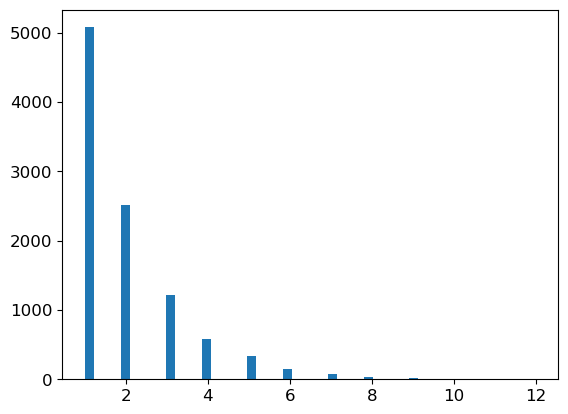

In [680]:
geom_distrib = geom(0.5).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)

(array([1.541e+03, 1.306e+03, 1.075e+03, 9.410e+02, 8.250e+02, 6.680e+02,
        5.750e+02, 4.650e+02, 3.820e+02, 3.230e+02, 3.080e+02, 2.300e+02,
        2.210e+02, 1.690e+02, 1.370e+02, 9.900e+01, 1.240e+02, 1.070e+02,
        8.200e+01, 6.400e+01, 6.400e+01, 5.000e+01, 4.100e+01, 2.900e+01,
        2.500e+01, 2.300e+01, 2.500e+01, 1.400e+01, 1.100e+01, 1.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 9.000e+00, 8.000e+00, 6.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.16348231e-05, 1.63460314e-01, 3.26908993e-01, 4.90357673e-01,
        6.53806352e-01, 8.17255031e-01, 9.80703710e-01, 1.14415239e+00,
        1.30760107e+00, 1.47104975e+00, 1.63449843e+00, 1.79794711e+00,
        1.96139579e+00, 2.12484447e+00, 2.28829314e+00, 2.45174182e+00,
        2.61519050e+00, 2.77863918e+00, 2.94208786e+00, 3.10553654e+00,
        3.268985

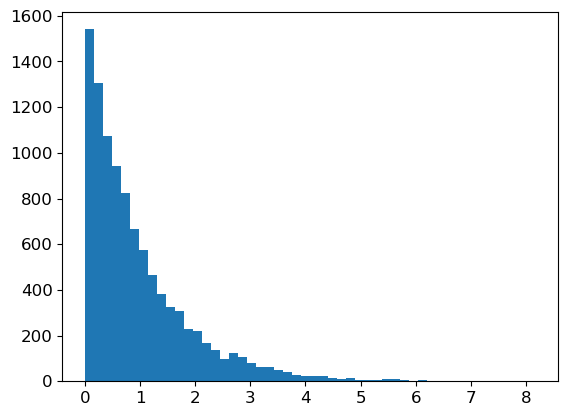

In [681]:
expon_distrib = expon().rvs(10000, random_state=42)
plt.hist(expon_distrib, bins=50)

(array([217., 189., 198., 205., 219., 179., 206., 219., 185., 210., 206.,
        181., 199., 221., 210., 177., 216., 191., 215., 175., 219., 193.,
        179., 192., 182., 201., 196., 168., 190., 216., 187., 194., 199.,
        220., 196., 237., 204., 187., 226., 207., 197., 197., 181., 225.,
        205., 205., 185., 208., 201., 185.]),
 array([2.38949195e-06, 1.99957568e-02, 3.99891240e-02, 5.99824913e-02,
        7.99758586e-02, 9.99692259e-02, 1.19962593e-01, 1.39955960e-01,
        1.59949328e-01, 1.79942695e-01, 1.99936062e-01, 2.19929430e-01,
        2.39922797e-01, 2.59916164e-01, 2.79909531e-01, 2.99902899e-01,
        3.19896266e-01, 3.39889633e-01, 3.59883000e-01, 3.79876368e-01,
        3.99869735e-01, 4.19863102e-01, 4.39856470e-01, 4.59849837e-01,
        4.79843204e-01, 4.99836571e-01, 5.19829939e-01, 5.39823306e-01,
        5.59816673e-01, 5.79810040e-01, 5.99803408e-01, 6.19796775e-01,
        6.39790142e-01, 6.59783510e-01, 6.79776877e-01, 6.99770244e-01,
        7.

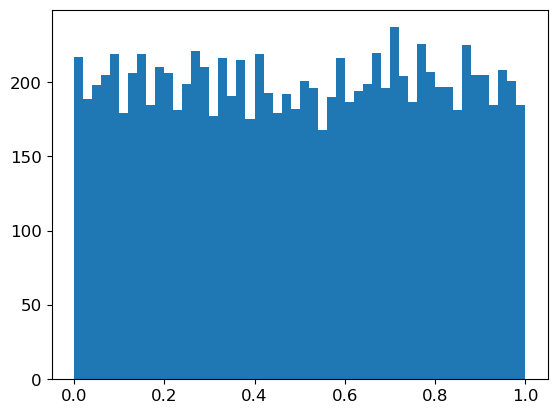

In [682]:
uniform_distrib = uniform().rvs(10000)
plt.hist(uniform_distrib, bins=50)

(array([  2.,   1.,   1.,   0.,   6.,   4.,  18.,  12.,  20.,  34.,  39.,
         76.,  94., 135., 141., 213., 264., 305., 379., 444., 468., 553.,
        571., 618., 621., 612., 616., 588., 536., 492., 393., 378., 322.,
        251., 199., 182., 110.,  86.,  81.,  39.,  31.,  25.,  15.,   8.,
          9.,   4.,   1.,   1.,   0.,   2.]),
 array([-3.92240025e+00, -3.76542749e+00, -3.60845473e+00, -3.45148197e+00,
        -3.29450921e+00, -3.13753646e+00, -2.98056370e+00, -2.82359094e+00,
        -2.66661818e+00, -2.50964542e+00, -2.35267266e+00, -2.19569990e+00,
        -2.03872714e+00, -1.88175438e+00, -1.72478162e+00, -1.56780886e+00,
        -1.41083611e+00, -1.25386335e+00, -1.09689059e+00, -9.39917828e-01,
        -7.82945068e-01, -6.25972309e-01, -4.68999550e-01, -3.12026791e-01,
        -1.55054032e-01,  1.91872741e-03,  1.58891487e-01,  3.15864246e-01,
         4.72837005e-01,  6.29809764e-01,  7.86782523e-01,  9.43755282e-01,
         1.10072804e+00,  1.25770080e+00,  1.41467

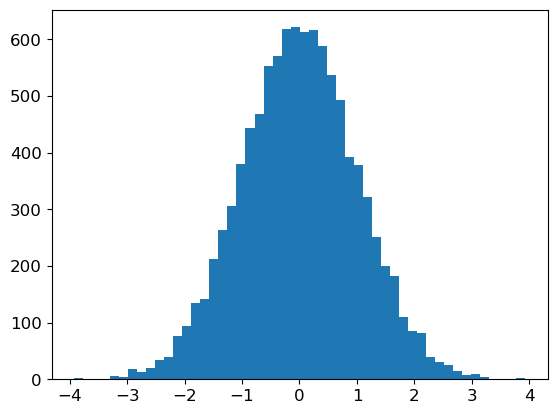

In [683]:
norm_distrib = norm().rvs(size=10000, random_state=42)
plt.hist(norm_distrib, bins=50)